<a href="https://colab.research.google.com/github/lawren-ai/-LAPD-Crime-Data-Analysis-Visualization/blob/main/CrimesInLosAngeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset
crimes_data = pd.read_csv("/content/crimes.csv")
crimes_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [3]:
print(crimes_data.shape)
print(crimes_data.info())

(185715, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB
None


In [4]:
# First Task: Peak Crime Hour

# Extract hour from TIME OCC
crimes_data['HOUR'] = crimes_data['TIME OCC'] // 100

# Find the hour with the highest frequency of crimes
peak_crime_hour = crimes_data['HOUR'].value_counts().idxmax()
print("Peak Crime Hour:", peak_crime_hour)

Peak Crime Hour: 12


<ipython-input-5-11d5513124e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HOUR', data=crimes_data, palette='viridis')


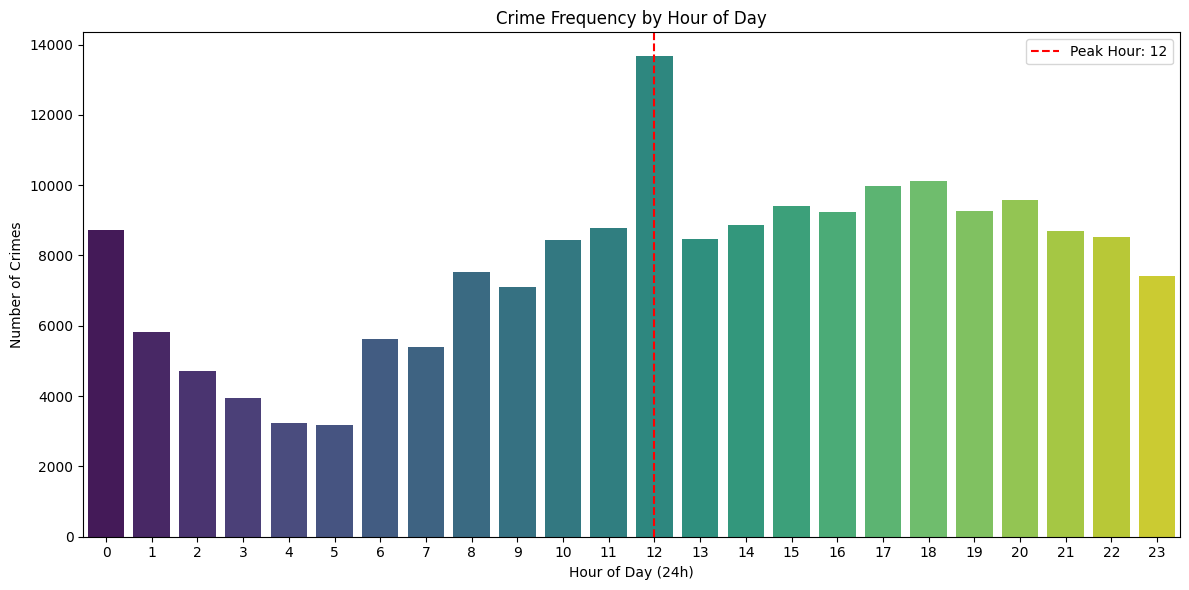

In [5]:
# Visualization to show crimes per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='HOUR', data=crimes_data, palette='viridis')
plt.title('Crime Frequency by Hour of Day')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24))
plt.axvline(peak_crime_hour, color='red', linestyle='--', label=f'Peak Hour: {peak_crime_hour}')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Second Task: Area with most night crimes (10pm–3:59am)

# Define night hours
night_hours = list(range(22, 24)) + list(range(0, 4))
night_crimes = crimes_data[crimes_data['HOUR'].isin(night_hours)]

# Find area with the most night crimes
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()
print("Peak Night Crime Location:", peak_night_crime_location)

Peak Night Crime Location: Central


<ipython-input-7-3dbccb7adda5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_night_areas.values, y=top_night_areas.index, palette='magma')


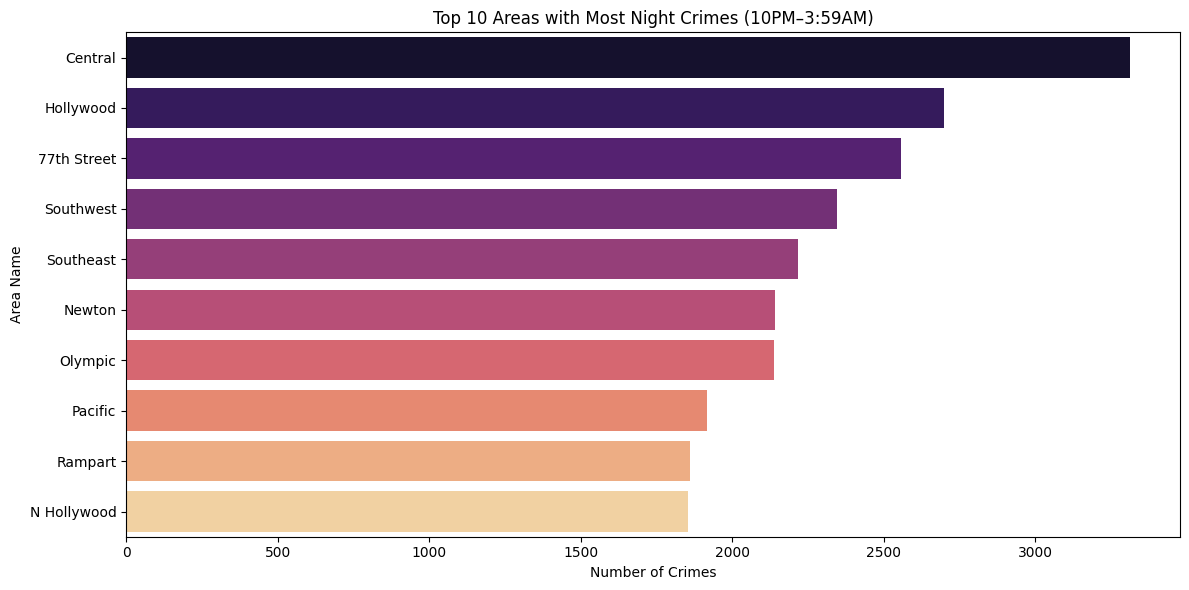

In [7]:
# Visualizing Night crimes by location (Top 10)
plt.figure(figsize=(12, 6))
top_night_areas = night_crimes['AREA NAME'].value_counts().nlargest(10)
sns.barplot(x=top_night_areas.values, y=top_night_areas.index, palette='magma')
plt.title('Top 10 Areas with Most Night Crimes (10PM–3:59AM)')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.tight_layout()
plt.show()

In [8]:
# Third Task: Victim Age Groups and Crime Frequency

# Define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]

age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Categorize into age groups
crimes_data['age_group'] = pd.cut(crimes_data['Vict Age'], bins=age_bins, labels=age_labels, right=True)

# Count crimes by age group
victim_ages = crimes_data['age_group'].value_counts().sort_index()
print("Victim Age Group Distribution:")
print(victim_ages)

Victim Age Group Distribution:
age_group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


<ipython-input-9-7b778defa833>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=victim_ages.index, y=victim_ages.values, palette='coolwarm')


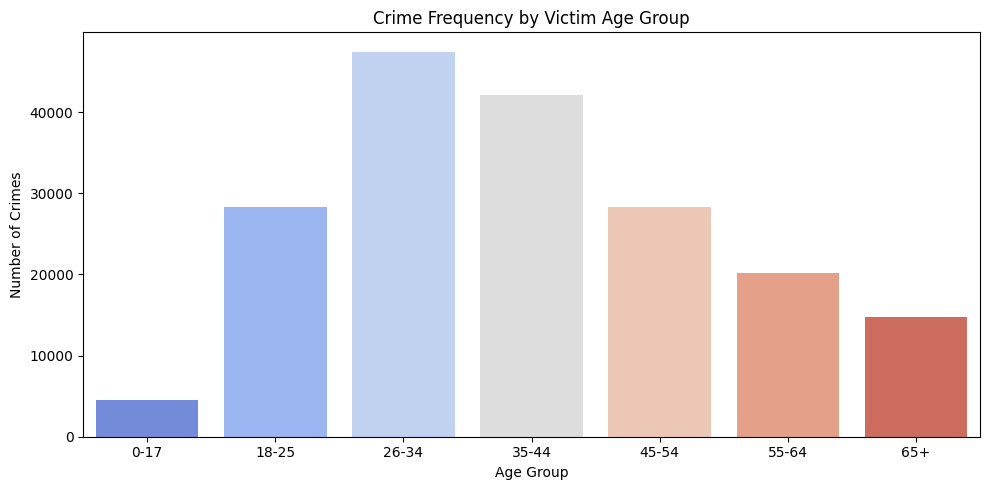

In [9]:
# Visualization for task 3: Crimes by victim age group
plt.figure(figsize=(10, 5))
sns.barplot(x=victim_ages.index, y=victim_ages.values, palette='coolwarm')
plt.title('Crime Frequency by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

<ipython-input-10-5e63a2daf273>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='Set2')


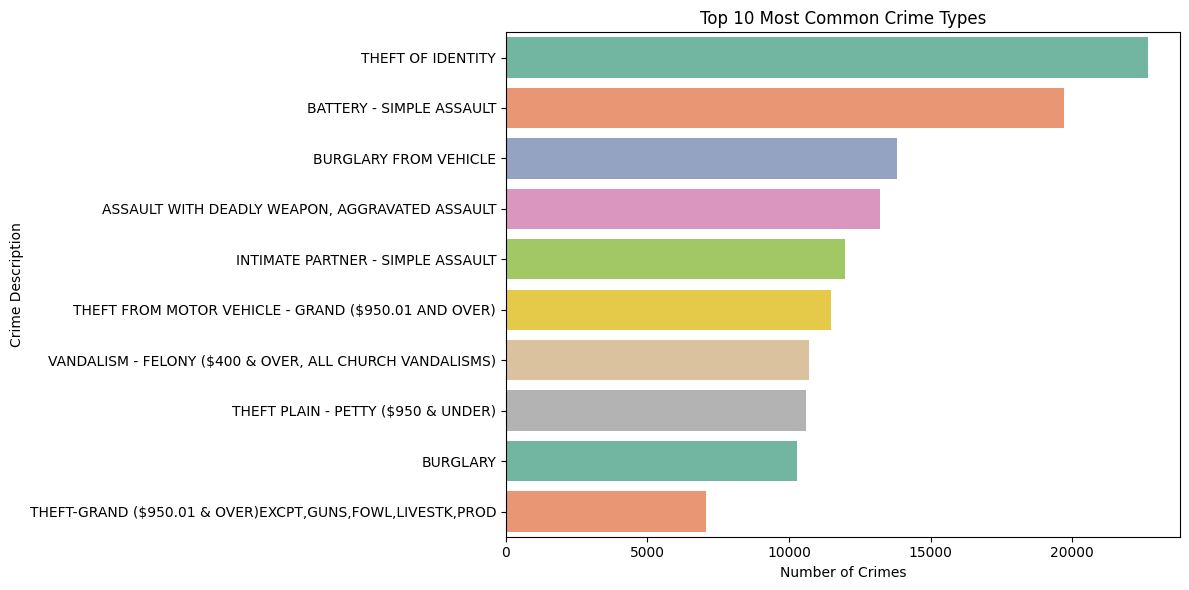

In [10]:
# Top 10 crime types
plt.figure(figsize=(12, 6))
top_crimes = crimes_data['Crm Cd Desc'].value_counts().nlargest(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='Set2')
plt.title('Top 10 Most Common Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Description')
plt.tight_layout()
plt.show()


<ipython-input-11-b71ddfcc9a8a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_violent', data=crimes_data, palette='Set1')


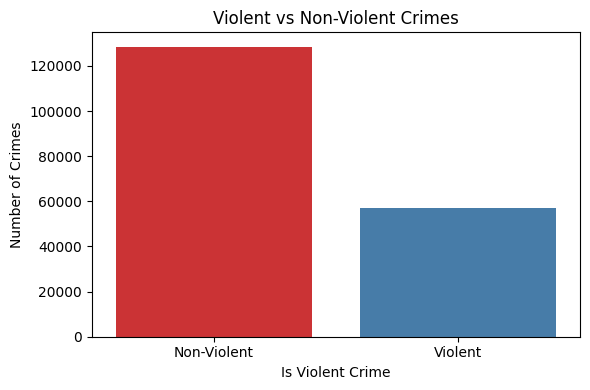

In [11]:
# Define a simple violent crime filter
violent_keywords = ['ASSAULT', 'ROBBERY', 'HOMICIDE', 'BATTERY', 'RAPE']
crimes_data['is_violent'] = crimes_data['Crm Cd Desc'].str.contains('|'.join(violent_keywords), case=False, na=False)

# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='is_violent', data=crimes_data, palette='Set1')
plt.title('Violent vs Non-Violent Crimes')
plt.xlabel('Is Violent Crime')
plt.ylabel('Number of Crimes')
plt.xticks([0, 1], ['Non-Violent', 'Violent'])
plt.tight_layout()
plt.show()


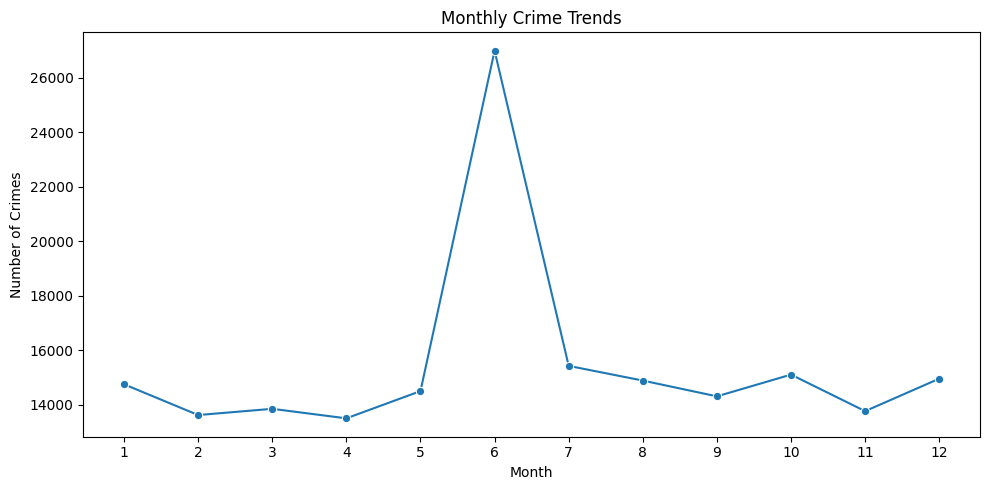

In [12]:
# Convert date and extract month
crimes_data['DATE OCC'] = pd.to_datetime(crimes_data['DATE OCC'], errors='coerce')
crimes_data['Month'] = crimes_data['DATE OCC'].dt.month

# Crimes per month
monthly_counts = crimes_data['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


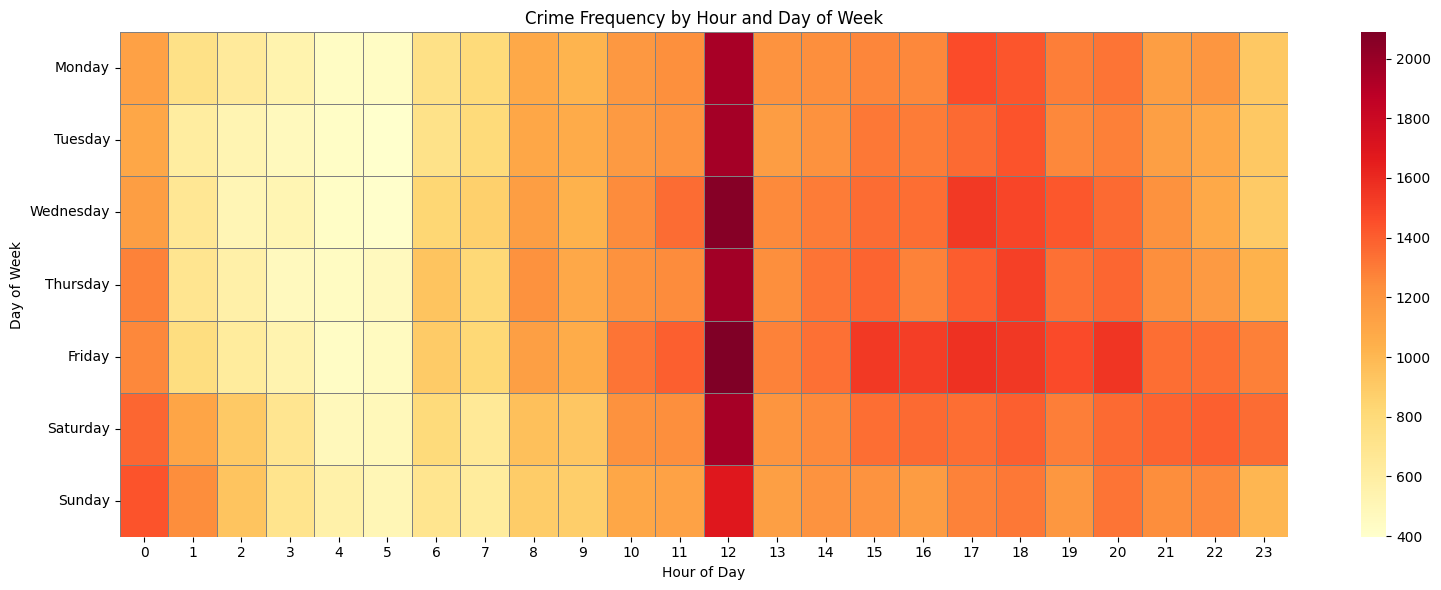

In [13]:
# Convert DATE OCC to datetime
crimes_data['DATE OCC'] = pd.to_datetime(crimes_data['DATE OCC'], errors='coerce')

# Drop rows where conversion failed
crimes_data = crimes_data.dropna(subset=['DATE OCC'])

# Extract Day of Week
crimes_data['DayOfWeek'] = crimes_data['DATE OCC'].dt.day_name()


# Create pivot table: number of crimes by day and hour
heatmap_data = crimes_data.pivot_table(index='DayOfWeek', columns='HOUR', values='DR_NO', aggfunc='count')

# Reorder days of week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Crime Frequency by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()